<a href="https://colab.research.google.com/github/RozminWaghu99/Sentimental-Analysis-Project/blob/main/Sentimental_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Dependencies

In [40]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove('not')
stop_words.remove('no')
import re
import wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
#for accuracy
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, accuracy_score, roc_auc_score,auc
from matplotlib import style
style.use('classic')
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the twitter data

In [41]:
d = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Project/Project Twitter/training.1600000.processed.noemoticon.csv",encoding='latin-1',header=None)
d.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Assigning columns name

In [42]:
d.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'tweets']
d.head()

,sentiment,id,date,query,user_id,tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Inspecting DataFrame

In [43]:
d.shape

(1600000, 6)

- Total rows : 1600000
- Total columns : 6

# Inspecting data

In [44]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user_id    1600000 non-null  object
 5   tweets     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


# Check Any missisng or NAN values in present in data or not?

In [45]:
d.isnull().sum()

sentiment    0
id           0
date         0
query        0
user_id      0
tweets       0
dtype: int64

In [46]:
d['sentiment'].unique()

array([0, 4])

- Two type of sentiments present in the data.Let's check which is good or bad tweets.

In [47]:
d[d.sentiment == 0].head(10)

,sentiment,id,date,query,user_id,tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


- After reading the tweets we can conclude 0 is used for bad tweets.

In [48]:
d[d.sentiment == 4].head(10)

,sentiment,id,date,query,user_id,tweets
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
800005,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just bu...
800006,4,1467822447,Mon Apr 06 22:22:51 PDT 2009,NO_QUERY,vmdavinci,@r_keith_hill Thans for your response. Ihad al...
800007,4,1467822465,Mon Apr 06 22:22:48 PDT 2009,NO_QUERY,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,1467822489,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...


- After reading the tweets we can conclude 4 is used for good tweets.

Just for our betterment we convert 4 to 1. So our output is in proper binary version.

In [49]:
d['sentiment'].mask(d['sentiment'] == 4, 1, inplace=True)
d['sentiment'].unique()

array([0, 1])

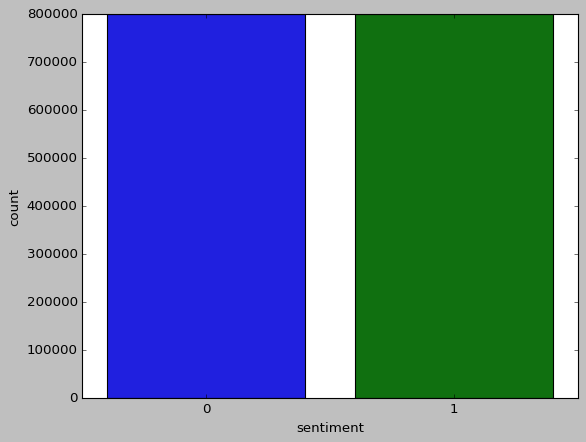

In [50]:
sns.countplot(x=d['sentiment'], data=d)
plt.title("Sentments")

# Creating target column y

In [51]:
y=d.iloc[0:,0]
y

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: sentiment, Length: 1600000, dtype: int64

# Checking target incidence

In [52]:
y.value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

Our data is fully balanced.

# Creating features column

In [53]:
x=d.iloc[0:,-1]
x

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: tweets, Length: 1600000, dtype: object

# Data processing for modelling

We need to clean data to train a model. So, 
 we have performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis, Contractions to expansions. The text document is then converted into the lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we have also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

At last, we then performed Stemming(reducing the words to their derived stems)

In [54]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "i had",
"i'd've": "i would have",
"i'll": "i shall",
"i'll've": "i shall have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "wwhat is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"
}


def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

x = x.apply(cont_to_exp)
x.head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he cannot update his Facebook by...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it is not behaving at all...
Name: tweets, dtype: object

In [55]:
def data_processing(text):
    text = text.lower()                        #Lower Case Conversion
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)  #Remove HTML Tags
    text = re.sub(r'\@w+|\#','',text)          #removing hastags
    text = re.sub(r'[^\w\s]','',text)          #remove puctuation
    text = re.sub(r'\d+','', text)             #remove numbers
    text = text.strip()                        #remove white space
    text_tokens = word_tokenize(text)          #tokenization

    filtered_text = [w for w in text_tokens if not w in set(stop_words)]   #remove stop_word
    return " ".join(filtered_text)
    

x = x.apply(data_processing)
x.head()

0    switchfoot httptwitpiccomyzl awww bummer shoul...
1    upset not update facebook texting might cry re...
2    kenichan dived many times ball managed save re...
3                     whole body feels itchy like fire
4          nationwideclass no not behaving mad not see
Name: tweets, dtype: object

# Porter Stemming:
reducing the words to their derived stems.

In [56]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data


x = x.apply(lambda x: stemming(x))
x.head()

0    switchfoot httptwitpiccomyzl awww bummer shoul...
1    upset not update facebook texting might cry re...
2    kenichan dived many times ball managed save re...
3                     whole body feels itchy like fire
4          nationwideclass no not behaving mad not see
Name: tweets, dtype: object

# Lemmatization:
reducing the derived words to their root form known as lemma for better results.

In [57]:
lm = WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

x = x.apply(lambda a: lemmatizer_on_text(a))
x.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    switchfoot httptwitpiccomyzl awww bummer shoul...
1    upset not update facebook texting might cry re...
2    kenichan dived many times ball managed save re...
3                     whole body feels itchy like fire
4          nationwideclass no not behaving mad not see
Name: tweets, dtype: object

# Plot a cloud of words for negative tweets

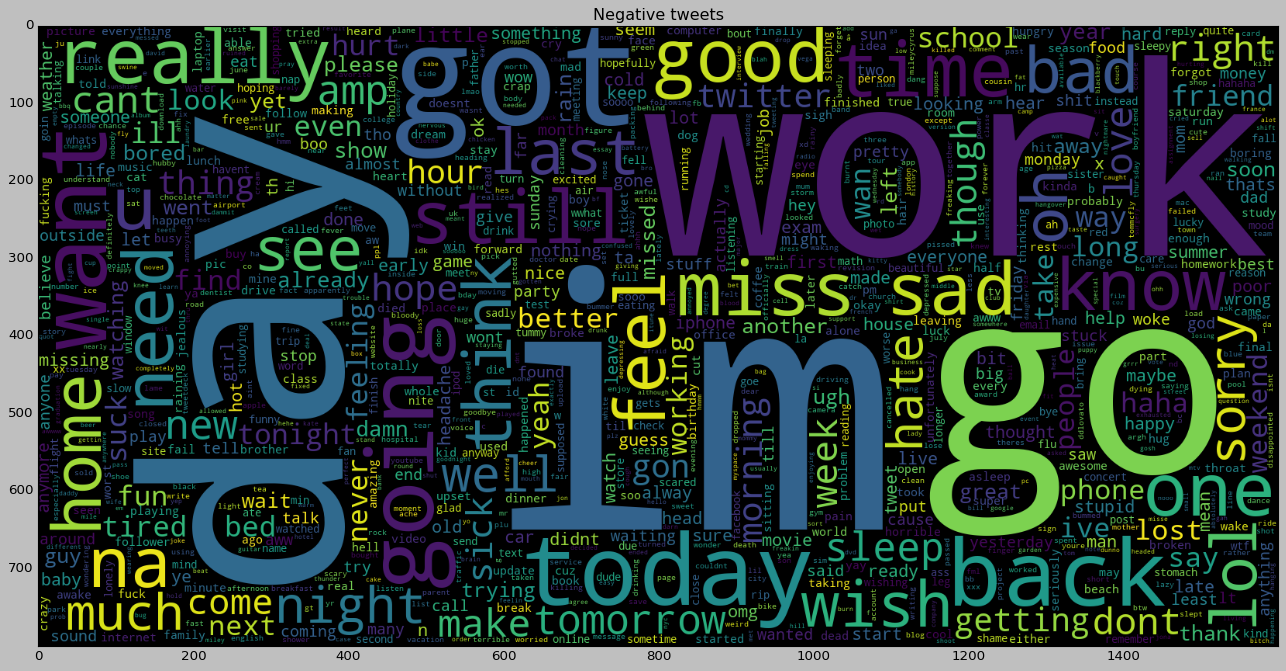

In [58]:
negative_tweet = x[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative_tweet))
plt.title("Negative tweets")
plt.imshow(wc)


# Plot a cloud of words for positive tweets

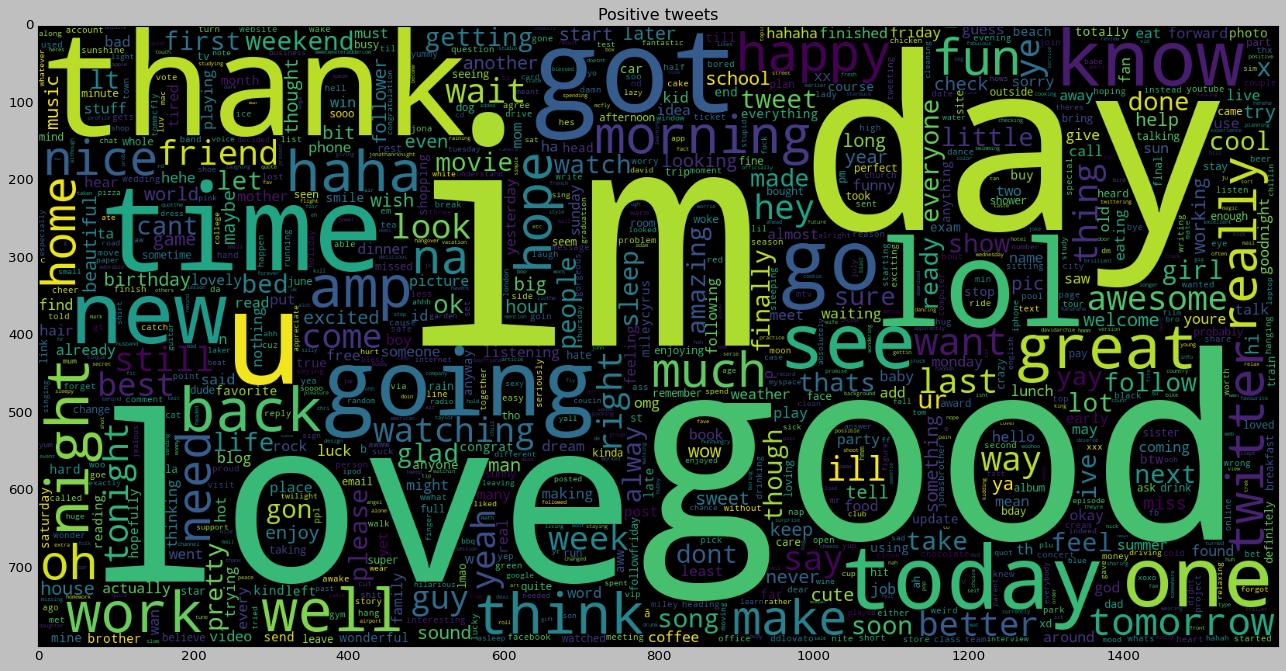

In [59]:
positive_tweet = x[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(positive_tweet))
plt.figure(figsize = (20,20))
plt.title("Positive tweets")
plt.imshow(wc)

# Transforming Dataset using TF-IDF Vectorizer

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfid_d=tfidf.fit_transform(x)

# Splitting twitter data into train, valid and test datasets

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfid_d, y, train_size=0.7, stratify=y)
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1120000, 802976)
Size of y_train: (1120000,)
Size of x_test: (480000, 802976)
Size of y_test: (480000,)


# Model Building and Evaluation

Confusion Matrix for different models
Logistic Regression
BNBmodel
LinearSVC


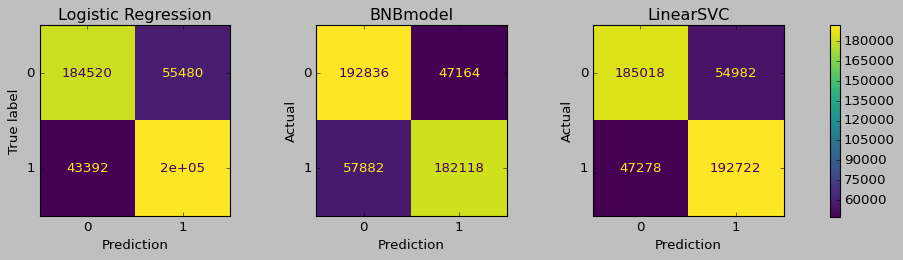

,CV_Score,X_train_Pred_Acc,X_test_Pred_Acc,Roc_Auc_Score
Logistic Regression,0.791871,0.821071,0.794017,0.794017
LinearSVC,0.783590,0.900199,0.786958,0.786958
BNBmodel,0.778235,0.846436,0.781154,0.781154


In [68]:
models = {"Logistic Regression": LogisticRegression(), 
         "BNBmodel" : BernoulliNB(),
          "LinearSVC":LinearSVC()
          }

res = {}
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
f, axes = plt.subplots(1, 3, figsize=(15, 3))
print("Confusion Matrix for different models")
for i, (name, model) in enumerate(models.items()):
    n = name + " "     
    print(name)
    # fit the model with the training data
    clf = model.fit(x_train,y_train)
    # predict the target on train and test data
    y_pred_tr = model.predict(x_train)
    y_pred_ts = model.predict(x_test)
    #cross-validation score
    Cross_Validation_Score = cross_val_score(clf, x_train, y_train, cv=5).mean()
    #accuracy
    acc_pred_tr = np.mean(accuracy_score(y_train,y_pred_tr))
    acc_pred_ts = np.mean(accuracy_score(y_test,y_pred_ts))
    #RMS value
    #roc auc on test data
    Roc_Auc_Score =  roc_auc_score(y_test, y_pred_ts)

    #result
    res[n] = {"CV_Score": Cross_Validation_Score ,
            "X_train_Pred_Acc":acc_pred_tr,
            "X_test_Pred_Acc":acc_pred_ts,
            "Roc_Auc_Score":Roc_Auc_Score,
           }
    #plotting confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred_ts)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i])
    disp.ax_.set_title(name)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('Prediction')
  
    if i!=0:
        disp.ax_.set_ylabel('Actual')
    
plt.subplots_adjust(wspace=0.45, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

results = pd.DataFrame.from_dict(res, orient="index")
results = results[["CV_Score",'X_train_Pred_Acc','X_test_Pred_Acc','Roc_Auc_Score']]

results.sort_values(by='CV_Score', ascending=False)

# Conclusion
We can conclude, After all model evalution parameter Logistics Regression perfom well among all.

It gives better cross vaildation score 79.92% than Bernoulli Naive Bayes and linearSVC.
overall accuracy of logistic regression is 79.3% , other model gives 78%.


# let's finalised model
Logistics perform best from all them so we next predict the test data.

[0 1 0 ... 1 0 0]


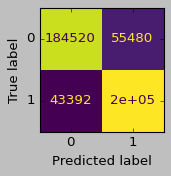



		LogisticRegression test classification_report 
                precision    recall  f1-score   support

           0       0.81      0.77      0.79    240000
           1       0.78      0.82      0.80    240000

    accuracy                           0.79    480000
   macro avg       0.79      0.79      0.79    480000
weighted avg       0.79      0.79      0.79    480000

Logistic ROC AUC : 79.402%


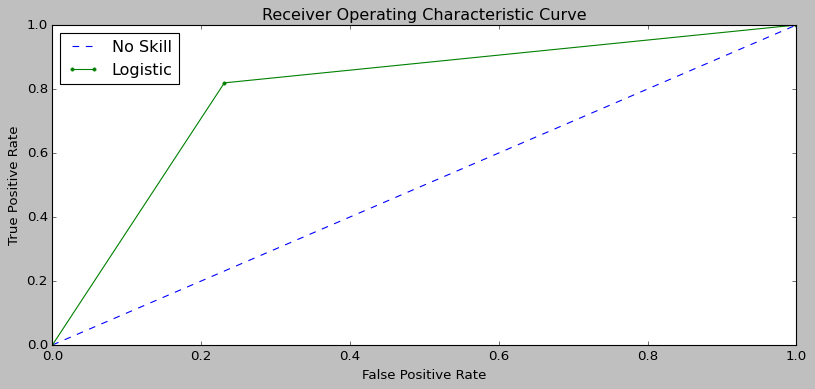

In [72]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

model=LogisticRegression()
model.fit(x_train,y_train)
test_pred=model.predict(x_test)
print(test_pred)
fig, ax = plt.subplots(figsize=(2,2))
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, labels=model.classes_, ax=ax, colorbar=False)
plt.show()
print("\n")
#classification report
print("\t\tLogisticRegression test classification_report \n ",classification_report(y_test, test_pred))
plt.figure(figsize=(12,5))

# calculate roc curve for model
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr,thresholds = roc_curve(y_test, test_pred)
roc_auc = auc(fpr, tpr)
print("Logistic ROC AUC : {:.3f}%".format(roc_auc*100))
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic Curve")
# show the legend
pyplot.legend(loc=2)
# show the plot
pyplot.show()

# Let's predicts new tweet from user

In [70]:
new_tweet = []
pred_sentiment = []

while True:

  
## ask for a new tweet
  tweet = input("Please type an  tweet (Type 'end' to exit) - ")

  if tweet == 'end':
    print("See you soon!")
    break
  else:
    rev_vec= tfidf.transform([tweet])
    prediction = model.predict(rev_vec)

    if prediction == 1:
       result = 'Positive'
       print("Result: This tweet is positive\n")
    else:
       result = 'Negative'
       print("Result: This tweet is negative\n")
  
  new_tweet.append(tweet)
  pred_sentiment.append(result)

Results_Summary = pd.DataFrame({'New_Tweet': new_tweet,'Sentiment': pred_sentiment,})

Results_Summary

Please type an  tweet (Type 'end' to exit) - you look good
Result: This tweet is positive

Please type an  tweet (Type 'end' to exit) - product is good but it's expensive
Result: This tweet is negative

Please type an  tweet (Type 'end' to exit) - @sara movie has high ratings
Result: This tweet is positive

Please type an  tweet (Type 'end' to exit) - www.abc.com is bad weblink
Result: This tweet is negative

Please type an  tweet (Type 'end' to exit) - end
See you soon!


,New_Tweet,Sentiment
0,you look good,Positive
1,product is good but it's expensive,Negative
2,@sara movie has high ratings,Positive
3,www.abc.com is bad weblink,Negative
